# Springboard Capstone 3-Data Wrangling and EDA

# Image Processing: Image Classification and Recognition System

Image processing is used for everything from automatically tagging pictures in social media to unlocking our phones. Recent advancements in deep learning have made the accuracy of face recognition better. In this project, I will like to use the Humans dataset to develop a face recognition system that can detect faces in images, identify the faces, and modify faces with digital makeup. I will start by setting up a development environment, and then train machine learning models to analyze images and identify facial landmarks. I will also code the facial feature detection, representing a face as a set of measurements, and encoding faces. Lastly, I will repurpose and adjust any of the existing ML systems I built.

The dataset was taken from Kaggle(https://www.kaggle.com/ashwingupta3012/human-faces?select=Humans). It has a collection of 7.2k+ images. It has a mix of front face, side profile pictures which will help achieve great identifying results and an improved range of classifier/recognition possibilities.

# Deliverables

In [327]:
import os, random, shutil, glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from skimage import color
from skimage import io, filters, transform, restoration, measure, segmentation, feature
%matplotlib inline
from PIL import Image
import glob
import skimage


There are two folders with images. one is named train, that's where all the training images are stored. Humans_faces folder has about 1000 images that the model will be tested upon.

In [331]:
folder_hum_faces = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces'
a=random.choice(os.listdir(folder))
print(a)


1 (5157).jpg


I see that images in the humnan face folder aren't labeled with alphabets

In [344]:
folder = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file'
filename = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/train'

In [335]:
images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.png')] #picking only images in png format

ic = [] #empty collection list
for img in images:
    ic.append(io.imread(img).flatten()) #appending png images to the empty collection list

In [340]:
ic

[array([102, 110,  86, ..., 255, 255, 255], dtype=uint8),
 array([119, 110, 105, ..., 149, 143, 157], dtype=uint8),
 array([251, 246, 244, ..., 186, 166, 155], dtype=uint8),
 array([127, 136,  88, ..., 178, 174, 168], dtype=uint8),
 array([102, 102, 102, ...,  70,  70,  70], dtype=uint8),
 array([35, 37, 39, ..., 44, 28, 13], dtype=uint8),
 array([251, 240, 235, ..., 255, 250, 245], dtype=uint8),
 array([255, 255, 255, ..., 215, 212,  23], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([ 7, 10,  5, ...,  7, 10,  4], dtype=uint8),
 array([ 96, 105, 104, ...,  45,  47, 255], dtype=uint8),
 array([68, 68, 68, ..., 66, 66, 66], dtype=uint8),
 array([64, 47, 46, ..., 64, 47, 46], dtype=uint8),
 array([ 73,  90, 105, ..., 151, 146, 152], dtype=uint8),
 array([255, 255, 255, ..., 255, 255,   0], dtype=uint8),
 array([102, 102, 102, ...,  70,  70,  70], dtype=uint8),
 array([35, 37, 39, ..., 44, 28, 13], dtype=uint8),
 array([ 73,  90, 105, ..., 151, 146, 152], dtype=uint8)

In [339]:
skimage.io.imshow_collection(ic, plugin=None)

SyntaxError: positional argument follows keyword argument (<ipython-input-339-19fb241d4b66>, line 1)

Create a list of images in the train folder that are in jpg format

In [353]:
train_dir_jpg = [] # empty list to put all the jpg format images
for filename in glob.glob('train/*.jpg'): #assuming jpg
    im=Image.open(filename)
    train_dir_jpg.append(im)

In [262]:
train_dir_jpg

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x650 at 0x141CB4F10>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1066x1600 at 0x143359A30>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x141CB4B80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=736x1151 at 0x142334910>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x750 at 0x1421B4100>]

Create a list of images in the train folder that are in jpeg format

In [263]:
train_dir_jpeg = []
for filename in glob.glob('train/*.jpeg'):
    im=Image.open(filename)
    train_dir_jpeg.append(im)

In [264]:
train_dir_jpeg

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1066x1600 at 0x144EC5A60>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1066x1600 at 0x144EC5D30>]

Create a list of images in the train folder that are in png format

In [265]:
train_dir_png = []
for filename in glob.glob('train/*.png'):
    im=Image.open(filename)
    train_dir_png.append(im)

In [266]:
train_dir_png


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1920x1080 at 0x144EC5D60>]

While it is great to have seperate variables for image format, it will be better to have a list of filenames of all images in the train folder.

In [267]:
def get_imagelist(path): #define get_imagelist function to get the list of all images in a folder
  """  Returns a list of filenames for
    all jpg images in a directory. """

  return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpeg')] #.jpeg means only get images in jpeg format

In [268]:
get_imagelist('/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces')

['/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (10).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (11).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (12).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (13).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (14).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (15).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (16).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (17).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (18).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (19).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (2).jpeg',
 '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces/1 (20).jpeg',
 '/Us

# Lets see what some of the training images look like

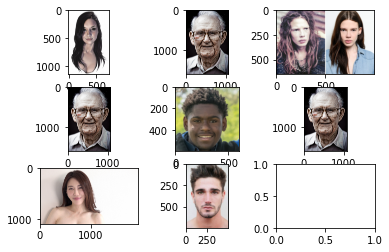

<Figure size 432x288 with 0 Axes>

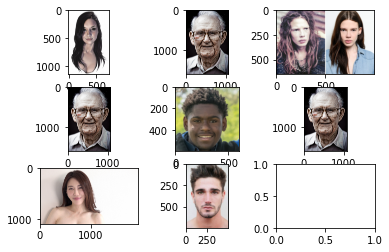

In [352]:
io.use_plugin('matplotlib')
a1 = io.imread_collection('/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/train/*')
plt.figure()
io.imshow_collection(a1)

In [210]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.figure(figsize=(16, 12))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = \
        plt.subplots(ncols=2, figsize=(16, 12), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

# Plotting Images, Points, and Lines

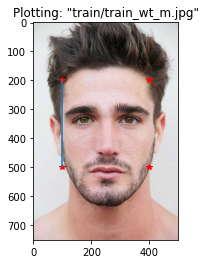

In [215]:
from pylab import *

# read image to array
im = array(Image.open('train/train_wt_m.jpg'))

# plot the image
imshow(im)

# some points
x = [100,100,400,400]
y = [200,500,200,500]

# plot the points with red star-markers
plot(x,y,'r*')

# line plot connecting the first two points
plot(x[:2],y[:2])

# add title and show the plot
title('Plotting: "train/train_wt_m.jpg"')
show()

# Histograms